### EEG Eye State Classification using Machine Learning

## Analyzing EEG signals to detect eye states (open vs. closed)
This notebook demonstrates the classification of EEG signals using machine learning to differentiate between open and closed eye states. The dataset comes from the UCI Machine Learning Repository. [EEG Eye State Dataset - UCI Repository](https://archive.ics.uci.edu/dataset/264/eeg+eye+state)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

## Data Cleaning

In [2]:
eeg_data = arff.loadarff('EEG Eye State.arff')
df = pd.DataFrame(eeg_data[0])
df['eyeDetection'] = df['eyeDetection'].replace({b'0': 0, b'1': 1})

/tmp/ipykernel_408/1392538247.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['eyeDetection'] = df['eyeDetection'].replace({b'0': 0, b'1': 1})


## Step 2: Visualize the Data Distribution

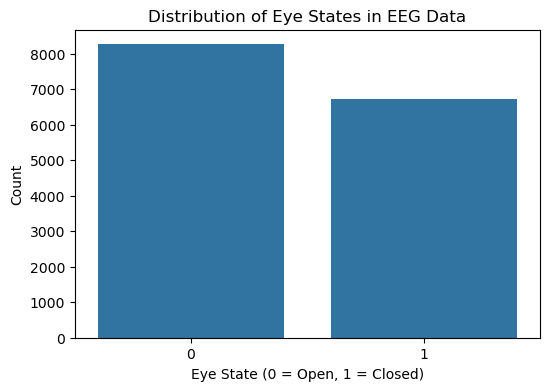

In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['eyeDetection'])
plt.xlabel("Eye State (0 = Open, 1 = Closed)")
plt.ylabel("Count")
plt.title("Distribution of Eye States in EEG Data")
plt.show()

## Step 3: Train Machine Learning Models (Random Forest & SVM)

In [4]:
X = df.drop(columns=['eyeDetection'])  # EEG signal features
y = df['eyeDetection']  # Eye state (0 = eyes open, 1 = eyes closed)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Train SVM classifier
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

# Evaluate models
rf_report = classification_report(y_test, y_pred_rf)
svm_report = classification_report(y_test, y_pred_svm)

print("Random Forest Classification Report:\n", rf_report)
print("SVM Classification Report:\n", svm_report)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1586
           1       0.95      0.88      0.91      1410

    accuracy                           0.92      2996
   macro avg       0.92      0.92      0.92      2996
weighted avg       0.92      0.92      0.92      2996

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69      1586
           1       0.00      0.00      0.00      1410

    accuracy                           0.53      2996
   macro avg       0.26      0.50      0.35      2996
weighted avg       0.28      0.53      0.37      2996



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Step 4: Compare Model Accuracies

In [5]:
# Compare accuracies
rf_accuracy = rf_clf.score(X_test, y_test)
svm_accuracy = svm_clf.score(X_test, y_test)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")

Random Forest Accuracy: 0.9212
SVM Accuracy: 0.5294


## Step 5: Confusion Matrix Visualization

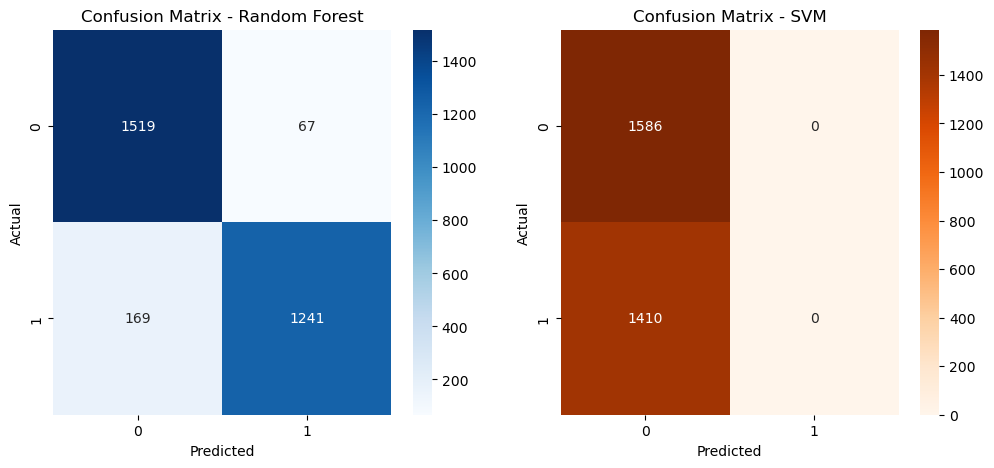

In [22]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")

plt.show()

## Conclusion
In this notebook, we successfully classified EEG eye states (open vs. closed) using Random Forest and SVM machine learning models.


## Key Takeaways:
* The EEG Eye State dataset was loaded and preprocessed.
* Random Forest and SVM models were trained and evaluated.
* The models' accuracy and performance were compared using classification reports and confusion matrices.